In [11]:
# Q1

from scipy import stats
import numpy as np

def question_one(data):
    # Calculate the sample mean, sample standard deviation, standard error of the mean (SEM), t statistic, 
    # degrees of freedom and p-value.
    
    # qualitative answers for Q1
    print("Null hypothesis: women's energy intake in 1991 is around the recommended at 7725kJ.")
    print("Alternate hypothesis: women's energy intake in 1991 deviates from the recommended amount.")
    print("A two-tailed test would be appropriate since my alternative hypothesis states that the average energy intake from the data collected from 1991 would deviate from 7725 KJ, hence the actual average can be less than or greater than the recommended amount.")
    
    n = len(data)
    alpha = 0.05    
    # true population mean of caloric intake (KJ)
    u_0 = 7725 
    # compute mean
    mean = np.mean(data)
    # compute standard deviation (with ddof=1 since we are looking for the sample standard deviation)
    std = np.std(data, ddof=1)
    SEM = std / np.sqrt(n)
    # compute z score (t statistic)
    z = (mean - u_0) / SEM
    df = n - 1
    t_stat, p_val = stats.ttest_1samp(a=data, popmean=7725)
    
    print("sample mean:", mean)
    print("sample standard deviation:", std)
    print("SEM:", SEM)
    print("t-statistic = " + str(t_stat))  
    print("degrees of freedom:", df)
    print("p-value = " + str(p_val)) 
    print(f'since p-value < alpha ({p_val} < {alpha}), null hypothesis gets rejected.')
    
daily_energy_intake = np.array([5260, 5470, 5640, 6180, 6390, 6515, 6805, 7515, 7515, 8230, 8770])
question_one(daily_energy_intake)

Null hypothesis: women's energy intake in 1991 is around the recommended at 7725kJ.
Alternate hypothesis: women's energy intake in 1991 deviates from the recommended amount.
A two-tailed test would be appropriate since my alternative hypothesis states that the average energy intake from the data collected from 1991 would deviate from 7725 KJ, hence the actual average can be less than or greater than the recommended amount.
sample mean: 6753.636363636364
sample standard deviation: 1142.1232221373727
SEM: 344.3631083801271
t-statistic = -2.8207540608310193
degrees of freedom: 10
p-value = 0.018137235176105812
since p-value < alpha (0.018137235176105812 < 0.05), null hypothesis gets rejected.


In [12]:
# Q2

import math
import pandas as pd
from scipy import stats

def question_two(data):
    # check if variances are equal
    std1 = data.loc[['Ireland'], ['Standard Deviation']].values[0][0]
    std2 = data.loc[['Elsewhere'], ['Standard Deviation']].values[0][0]
    
    # check if variance of both data sets are similar
    assert((std1 / std2 > 0.5) and (std1 / std2 < 2))
    
    # retrieve means, standard deviations, and sample sizes from both datasets
    x1_mean = data.loc[['Ireland'], ['Mean']].values[0][0]
    x2_mean = data.loc[['Elsewhere'], ['Mean']].values[0][0]
    N1, N2 = data.loc[['Ireland'], ['Sample Size']].values[0][0], data.loc[['Elsewhere'], ['Sample Size']].values[0][0]
    
    # calculate degrees of freedom of both datasets
    dof = N1 + N2 - 2
    
    # calculate t-statistic and p value
    t_stat, p_val = stats.ttest_ind_from_stats(x1_mean, std1, N1, x2_mean, std2, N2, 'two-sided')
    print("t-statistic = " + str(t_stat))  
    print("p-value = " + str(p_val)) 
    
    # qualitative answers for Q2
    print("Null hypothesis: GOES of Guinness served in Ireland is about the same as those served elsewhere.")
    print("Alternate hypothesis: GOES of Guinness served in Ireland on average is not equal to those served elsewhere.")
    print("Two sample t-test is needed")
    print("Right-tailed test is required")
    
data = {'Sample Size': [42, 61],
        'Mean': [74, 57],
        'Standard Deviation': [7.4, 7.1]}

# Creates pandas DataFrame.
df = pd.DataFrame(data, index=['Ireland', 'Elsewhere'])
question_two(df)

t-statistic = 11.73775770205081
p-value = 1.3959536155161474e-20
Null hypothesis: GOES of Guinness served in Ireland is about the same as those served elsewhere.
Alternate hypothesis: GOES of Guinness served in Ireland on average is not equal to those served elsewhere.
Two sample t-test is needed
Right-tailed test is required


In [13]:
!pip3 install matplotlib

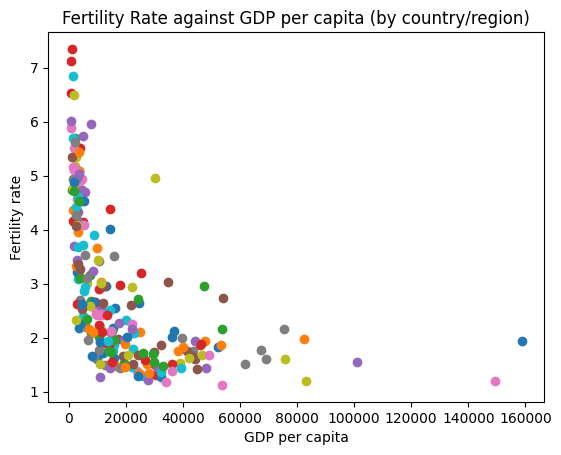

correlation coefficient: -0.515022471583651


In [14]:
# Q3

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def problem_three():
    gdp_worksheet = pd.read_excel("GDP_per_capita.xls", sheet_name = "Data")
    fertility_rate_worksheet = pd.read_excel("fertility_rate.xls", sheet_name = "Data")
    
    # find column number where data from 2013 is stored
    col_num_gdp_2013 = np.where(np.array(np.array(gdp_worksheet.iloc[2, 4:], dtype = 'int') == 2013))[0][0] + 4
    col_num_fertility_rate_2013 = np.where(np.array(np.array(fertility_rate_worksheet.iloc[2, 4:], dtype = 'int') == 2013))[0][0] + 4
    
    # retrieve gdp/fertility_rates from 2013
    gdp = gdp_worksheet.iloc[3:, col_num_gdp_2013]
    fertility_rate = fertility_rate_worksheet.iloc[3:, col_num_fertility_rate_2013]
    
    # retrieve countries/regions from both datasets
    gdp_countries = gdp_worksheet.iloc[3:, 0]
    fertility_rate_countries = fertility_rate_worksheet.iloc[3:, 0]

    # create dataframe for gdp/fertility rates with corresponding countries
    gdp_data = {
        'Countries' : gdp_countries,
        'GDP per capita' : gdp
    }
    gdp_df = pd.DataFrame(gdp_data)
    
    fertility_rate_data = {
        'Countries' : fertility_rate_countries,
        'Fertility Rate' : fertility_rate
    }
    fertility_rate_df = pd.DataFrame(fertility_rate_data)
    
    # merge both data from GDP per capita and fertility rates with their corresponding countries/regions
    fertility_rate_gdp = pd.merge(fertility_rate_df, gdp_df, on='Countries')
     
    data_points = fertility_rate_gdp.shape[0]
    for i in range(data_points):
        x_i = fertility_rate_gdp['GDP per capita'].values[i]
        y_i = fertility_rate_gdp['Fertility Rate'].values[i]
        plt.scatter(x_i, y_i)
    
    plt.xlabel("GDP per capita")
    plt.ylabel("Fertility rate")
    plt.title("Fertility Rate against GDP per capita (by country/region)")
    plt.show()
    
    # calculate correlation coefficient 
    ccoef = fertility_rate_gdp['GDP per capita'].corr(fertility_rate_gdp['Fertility Rate'])
    print("correlation coefficient:", ccoef)

problem_three()

In [15]:
!pip install statsmodels

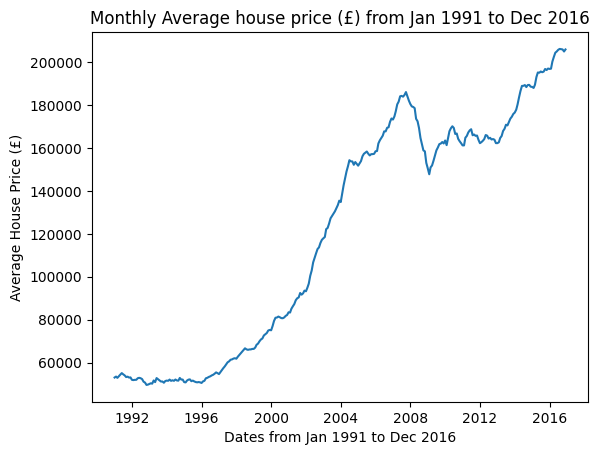

Annualized Returns: 5.35423853535919 %
There is evidence of seasonality with the spike in the first monthly return, which would correspond to January 1991. The first lag has the highest spike compared to other spikes of that year (spikes 1-11).
There is a trend in the time series in the Monthly Average house price graph in which monthly average house prices increased from 1992 until 2008, after which the price dipped.


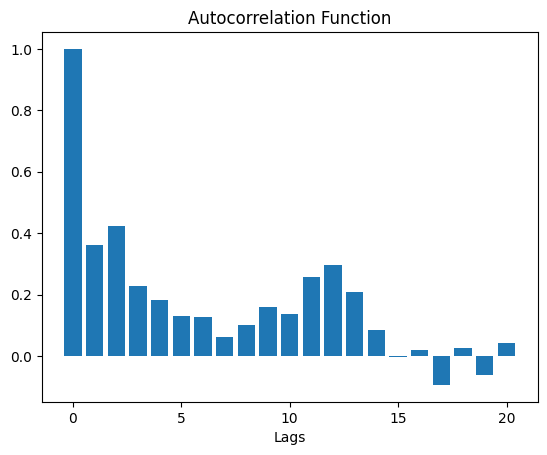

In [16]:
# Q4

import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm
import pandas as pd

def question_four():
    house_price_worksheet = pd.read_excel("Monthly Average House Price.xls")
    
    # retrieve all dates and average house prices of those dates
    dates = np.array(house_price_worksheet.iloc[:, 0], dtype='datetime64[D]')
    avg_house_price = np.array(house_price_worksheet["Average House Price"])
    
    # find where December 2016 is located and only retrieve data up to that date
    i = np.where(dates == np.array(['2016-12-01'], dtype='datetime64[D]'))[0][0]
    dates = dates[:i+1]
    avg_house_price = avg_house_price[:i+1]
    
    plt.plot(dates, avg_house_price)
    plt.xlabel("Dates from Jan 1991 to Dec 2016")
    plt.ylabel("Average House Price (£)")
    plt.title("Monthly Average house price (£) from Jan 1991 to Dec 2016")
    plt.show()
    
    # create Pandas dataframe with just dates and corresponding average house prices
    # to easily calculate monthly returns
    data = {
        'Dates' : dates,
        'Average House Price' : avg_house_price
    }
    
    df = pd.DataFrame(data)
    monthly_returns = df['Average House Price'].pct_change()
    df['Monthly Returns'] = monthly_returns
    plt.figure()
    plt.xlabel("Lags")
    plt.title("Autocorrelation Function")
    auto_corr = sm.tsa.acf(monthly_returns[1:], nlags=20)
    plt.bar(np.arange(21), auto_corr)
    
    # calculate annualized return 
    principal_investment = avg_house_price[0]
    final_investment = avg_house_price[-1]
    diff = final_investment - principal_investment
    n = 26
    annualized_returns = ((((principal_investment + diff) / principal_investment) ** (1/n)) - 1) * 100
    
    # qualitative answers for Q4
    print("Annualized Returns:", annualized_returns, "%")
    print("There is evidence of seasonality with the spike in the first monthly return, which would correspond to January 1991. The first lag has the highest spike compared to other spikes of that year (spikes 1-11).")
    print("There is a trend in the time series in the Monthly Average house price graph in which monthly average house prices increased from 1992 until 2008, after which the price dipped.")

question_four()

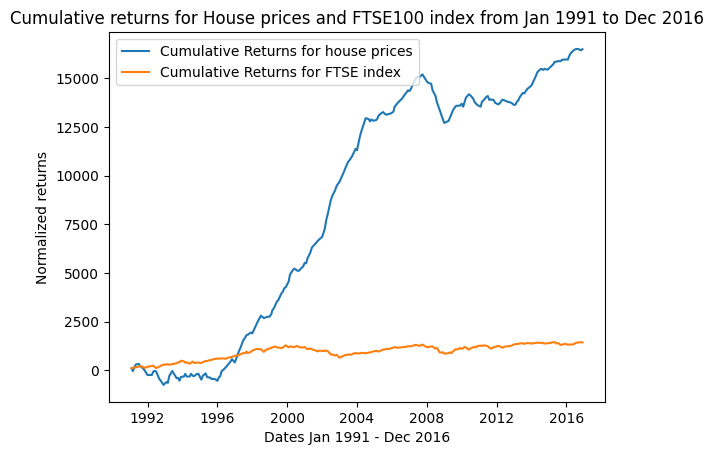

Annualized Returns: 4.462515478640672 %
During this period, it would have been better to invest in a UK house.


In [17]:
# Q5

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def question_five():
    house_price_worksheet = pd.read_excel("Monthly Average House Price.xls")
    ftse_worksheet = pd.read_csv('FTSE100.csv')
    
    # retrieve all dates and average house prices of those dates
    dates = np.array(house_price_worksheet.iloc[:, 0], dtype='datetime64[D]')
    
    # find where December 2016 is located and only retrieve data up to that date
    i = np.where(dates == np.array(['2016-12-01'], dtype='datetime64[D]'))[0][0]
    dates_house = dates[:i+1]
    avg_house_price = house_price_worksheet["Average House Price"].iloc[:i+1]
    
    # create dataframe with dates and average house prices
    data = {
        "Date" : dates_house,
        "Average House Price" : avg_house_price
    }
    df_avg_house_price = pd.DataFrame(data)
    
    # retrieve FTSE data by date
    dates_ftse = np.array(pd.to_datetime(ftse_worksheet['Date']), dtype='datetime64[D]')
    adj_close = np.array(ftse_worksheet['Adj Close'])
    dates_ftse = np.flip(dates_ftse)
    adj_close = np.flip(adj_close)
    
    # create dataframe with dates and adj close values
    data = {
        "Date" : dates_ftse,
        "Adj Close" : adj_close
    }
    df_ftse = pd.DataFrame(data)
    
    # merge both dataframes to have average house price and FTSE index in one data structure
    df = pd.merge(df_avg_house_price, df_ftse, on='Date')
   
    # calculate monthly returns 
    monthly_return_house = df["Average House Price"].pct_change()
    monthly_return_adj_close = df["Adj Close"].pct_change()
    
    # calculate cumulative sums
    cum_return_house = monthly_return_house.dropna().cumsum()
    cum_return_ftse = monthly_return_adj_close.dropna().cumsum()
    
    # normalize
    norm_cum_return_house = 100 * (cum_return_house / cum_return_house.iloc[0])
    norm_cum_return_ftse = 100 * (cum_return_ftse / cum_return_ftse.iloc[0])
    dates = df["Date"].iloc[1:]
    
    plt.plot(dates, norm_cum_return_house, label='Cumulative Returns for house prices')
    plt.plot(dates, norm_cum_return_ftse, label='Cumulative Returns for FTSE index')
    plt.xlabel("Dates Jan 1991 - Dec 2016")
    plt.ylabel("Normalized returns")
    plt.title("Cumulative returns for House prices and FTSE100 index from Jan 1991 to Dec 2016")
    plt.legend()
    plt.show()
    
    # calculate annualized return for FTSE100 index
    principal_investment = df_ftse['Adj Close'].iloc[0]
    final_investment = df_ftse['Adj Close'].iloc[-1]
    n = 26
    annualized_returns = ((((final_investment) / principal_investment) ** (1/n)) - 1) * 100
    
    # qualitative answers for Q5
    print("Annualized Returns:", annualized_returns, "%")
    print("During this period, it would have been better to invest in a UK house.")
    
question_five()
    